# Clustering

This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

### Table of contents

1. [Kmeans](#kmeans)
2. [Hierarchical clustering](#hierarchical)

---
# 0. Preliminaries 

Load libraries, data sets and useful functions. A good practice is to create auxiliary functions and/or classes in additional files.

In [1]:
# pandas, numpy and matplotlib
from src.utils import pd, np, plt

# Useful functions
from src.utils import load_examples, plot_scatter, plot_silhouette

We will use 4 synthetic data sets for illustration purposes

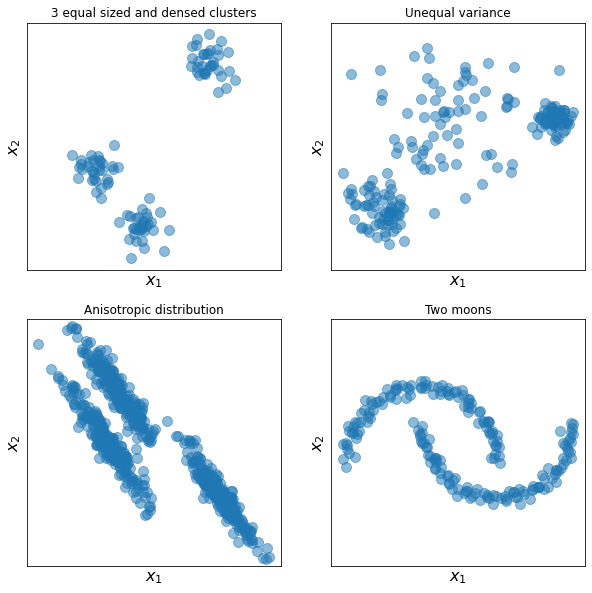

In [2]:
# load data sets
X1, y1, X2, y2, X3, y3, X4, y4 = load_examples()

# Do the plotting
plt.figure(figsize = (10,10))

plt.subplot(221)
plot_scatter(X1,'3 equal sized and densed clusters')

plt.subplot(222)
plot_scatter(X2,'Unequal variance')

plt.subplot(223)
plot_scatter(X3,'Anisotropic distribution')

plt.subplot(224)
plot_scatter(X4,'Two moons')

plt.show()

---
<a id='kmeans'></a>
# 1. K-means

Take a look at the [user guide](https://scikit-learn.org/stable/modules/clustering.html#k-means) and [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) provided by scikit-learn.

Let's start running k-means for the $X_1$, $y_1$ data set (top-left figure). We choose $k=3$ since it looks a good choice.

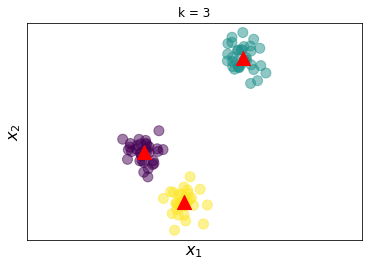

In [4]:
from sklearn.cluster import KMeans

# build the clustering model
k = 3
kmeans = KMeans(n_clusters = k)
kmeans.fit(X1)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X1,'k = ' + str(k), cluster_labels, centroids)
plt.show()

<div class = "alert alert-info">
<b>EXERCISE:</b> Change the value of $k$ and run the code again
</div>

We can also assign cluster labels to new points, using the predict method. Each new point is assigned to the closest cluster center when predicting, but the existing model is not changed

In [5]:
kmeans.predict(X1)

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1])

In [6]:
y1

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

## 1.1 How do you determine the optimal value of $k$?

Try running the algorithm for increasing $k$ and calculate the **inertia** (sum of squared distances of samples to their closest cluster center):

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

As $k$ increases, clusters become smaller, and inertia decreases. Plot this distance against the number of clusters

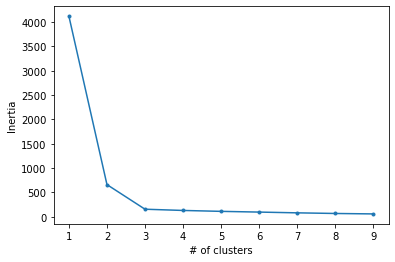

In [7]:
K = range(1,10)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

As we can see, it looks like 3 is a good candidate for the optimal value of $k$.

#### Silhouette coefficient

The [silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) can be also used to select the number of clusters.

For each sample in the data set, we can calculate a **silhouette coefficient** that measures of how close each point in one cluster is to points in the neighboring clusters. This coefficiente ranges from $-1$ to $1$, so that:
- Near +1 indicate that the sample is far away from the neighboring clusters. 
- A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and 
- Negative values indicate that those samples might have been assigned to the wrong cluster.

Silhouette coefficients can be plotted, thus providing a way to asses the number of clusters visually.

We can also calculate an **average silhouette coefficient** which gives a perspective into the density and separation of the formed clusters.

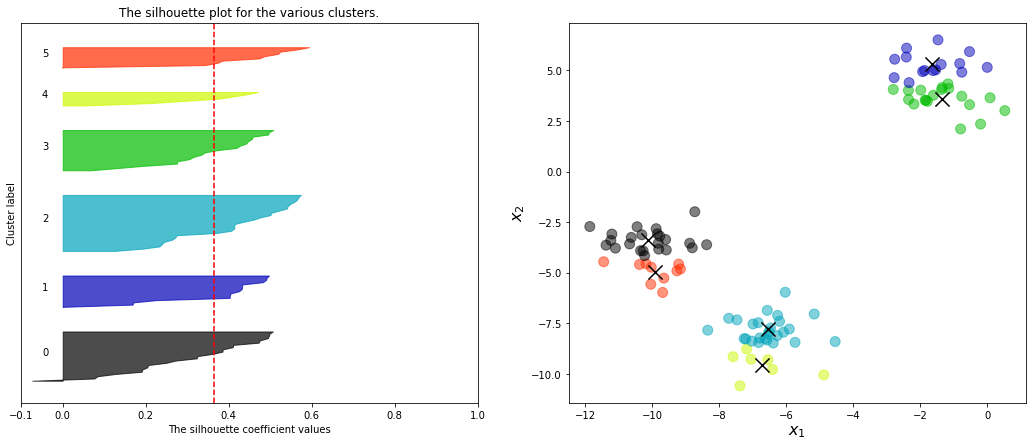

In [10]:
k = 6
kmeans = KMeans(n_clusters=k).fit(X1)
plot_silhouette(X1,k,kmeans.labels_,kmeans.cluster_centers_)

<div class = "alert alert-info">
<b>EXAMPLE:</b> For the $X_1$ data set, represent the silhouette score for different values of $k$.
</div>

**Hint**: `silhouette_avg = silhouette_score(X, cluster_labels)`

In [9]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7658249517662835
For n_clusters = 3 The average silhouette_score is : 0.7697092791808455
For n_clusters = 4 The average silhouette_score is : 0.6002438798684412
For n_clusters = 5 The average silhouette_score is : 0.45750559088571974
For n_clusters = 6 The average silhouette_score is : 0.3272145830950462


### Clustering performance evaluation

There are other metrics that we might want to calculate to analyze the quality of the clustering:

- **Cluster cardinality**: is the number of examples per cluster.
- **Cluster magnitude**: is the sum of distances from all examples to the centroid of the cluster

And many [others](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

## 1.2 More examples of k-means

<div class = "alert alert-info">
<b>EXERCISE:</b> Run the K-means for $X_2$, $X_3$, $X_4$ data sets. Use inertia to determine the number of clusters.
</div>

In [ ]:
# your code here
# ...

## 1.3 K-means some conclusions

Notice that 

1. In k-means, each cluster is defined solely by its center, which means that each cluster is a convex shape. As a result of this, **it can only capture relatively simple shapes**. 

2. k-means also assumes that **all clusters have the same “diameter”** in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. 

---
<a id='hierarchical'></a>
# 2. Hierarchical clustering

Let's start with an interpretable data set

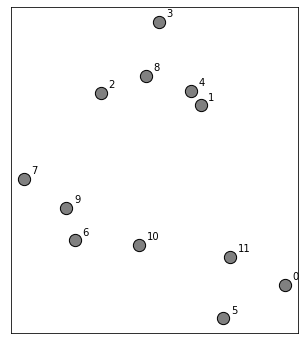

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=0, n_samples=12)

plt.figure(figsize=(6,6))
ax = plt.gca()
for i, x in enumerate(X):
    ax.text(x[0] + .15, x[1] + .15, "%d" % i, horizontalalignment='left', verticalalignment='center')

ax.scatter(X[:,0],X[:,1], c = 'grey', s = 150, edgecolors = 'k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_aspect('equal')
plt.show()

Scikit-learn currently **does not have the functionality to draw dendrograms**. However, you can generate them easily using SciPy. The [SciPy clustering](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) algorithms have a slightly different interface to the scikit-learn clustering algorithms. SciPy provides a function that takes a data array X and computes a linkage array, which encodes hierarchical cluster similarities. We can then feed this linkage array into the scipy dendrogram function to plot the dendrogram

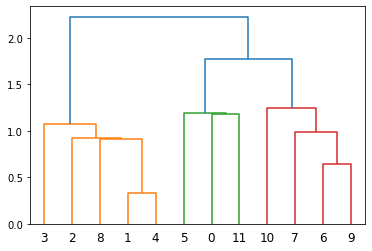

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'single')
dendrogram(Z)
plt.show()

In [13]:
Z

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 8.        , 12.        ,  0.91127175,  3.        ],
       [ 2.        , 14.        ,  0.92683223,  4.        ],
       [ 7.        , 13.        ,  0.98905877,  3.        ],
       [ 3.        , 15.        ,  1.07256525,  5.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 18.        ,  1.19494987,  3.        ],
       [10.        , 16.        ,  1.24367357,  4.        ],
       [19.        , 20.        ,  1.77156057,  7.        ],
       [17.        , 21.        ,  2.22606469, 12.        ]])

As we mentioned during the lecture:

- The Y-axis contains the measure of similarity between observations.
- The higher up the Y-axis, the more different two observations are.
- The height at which we cut the dendogram gives us the number of clusters.
- The same dendogram can be used to try out different numbers of clusters.


<div class = "alert alert-info">
<b>EXERCISE:</b> Take a look to the different linkage methods provided by SciPy.
</div>

Hint: [`scipy.cluster.hierarchy.linkag`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)


Once you decide the number of clusters you want to use using the dendrogram, you can use the scikit-learn function [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to cluster your data (you could do it also with SciPy [fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster) or the library [fastcluster](http://danifold.net/fastcluster.html?section=0)).

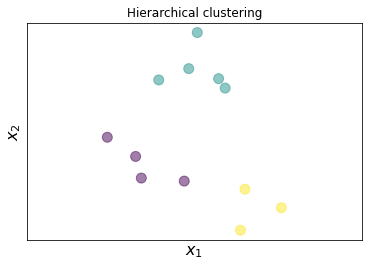

In [14]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3).fit(X)
plot_scatter(X,'Hierarchical clustering', agg.labels_) # we do not have centroids

<div class = "alert alert-info">
<b>EXERCISE:</b> Use the dendrogram to determine the number of clusters for cases from $X_1$ to $X_4$. Then, plot the resulting clusters. Try using different linkage metrics if results are not as expected.
</div>

In [ ]:
# Your code here
# ...

# References

The code in this notebook has been partially extracted from:

- A. Müller and S. Guido, [Introduction to Machine Learning with Python](https://github.com/amueller/introduction_to_ml_with_python).
- J. VanderPlas, [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)